In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df=pd.read_excel("Data_Train.xlsx",sheet_name='Sheet1')

In [ ]:
df = df.dropna(subset=['Total_Stops'])

In [ ]:
df['Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df['Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year

In [ ]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

In [ ]:
def convert_duration(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        minutes_part = duration.split('h')[1]
        if 'm' in minutes_part:
            minutes = int(minutes_part.split('m')[0])
    elif 'm' in duration:
        minutes = int(duration.split('m')[0])

    return hours * 60 + minutes

In [ ]:
df['Duration_Minutes'] = df['Duration'].apply(convert_duration)

In [ ]:
def convert_stops(stops):
    if stops == 'non-stop':
        return 0
    else:
        return int(stops.split()[0])

In [ ]:
df['Total_Stops_Numeric'] = df['Total_Stops'].apply(convert_stops)

In [ ]:
df['Total_Stops_Numeric'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
# df.isna().sum()

In [ ]:
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops'], inplace=True)

In [ ]:
df.sample()

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Duration_Minutes,Total_Stops_Numeric
5244,SpiceJet,Delhi,Cochin,No info,6749,27,5,2019,6,5,315,1


In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Additional_Info,object
Price,int64
Day,int32
Month,int32
Year,int32
Dep_Hour,int32
Dep_Minute,int32


In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.sample()

,Airline,Source,Destination,Additional_Info,Day,Month,Year,Dep_Hour,Dep_Minute,Duration_Minutes,Total_Stops_Numeric
2326,Air India,Mumbai,Hyderabad,No info,15,6,2019,13,55,90,0


In [ ]:
numeric_features = ['Duration_Minutes', 'Day', 'Month', 'Year', 'Dep_Hour', 'Dep_Minute', 'Total_Stops_Numeric']
categorical_features = ['Airline', 'Source', 'Destination', 'Additional_Info']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with RandomForestRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Duration_Minutes', 'Day',
                                                   'Month', 'Year', 'Dep_Hour',
                                                   'Dep_Minute',
                                                   'Total_Stops_Numeric']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 668.2029876922849
Mean Squared Error: 2343120.5766692893
R^2 Score: 0.8913313024767652


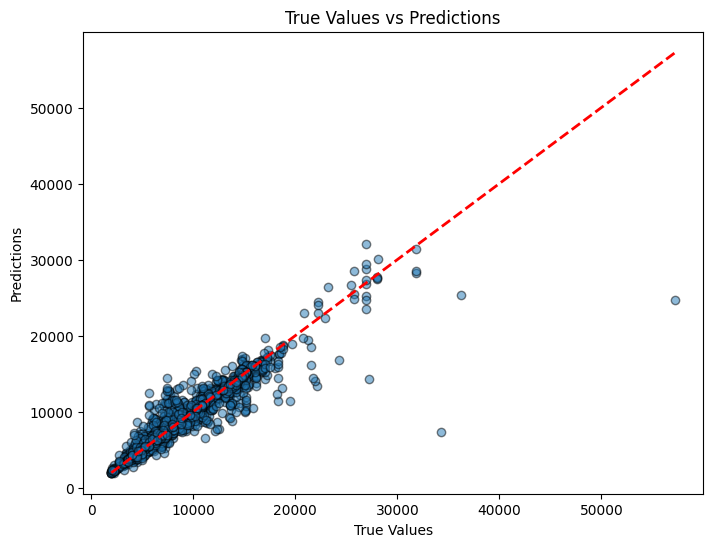

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

plt.show()